In [269]:
import tensorflow as tf
from PIL import Image
import torchvision.transforms as transforms

In [270]:
model=tf.keras.models.load_model("./models/imagecnn.h5")
classes=[
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"

]
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 9)         252       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 9)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 18)        1476      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 18)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 36)          5868      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 36)        

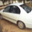

In [271]:
img=Image.open("./data/cifar10/train/automobile/10022_automobile.png")
img=img.resize((32,32))
img

In [272]:
transform=transforms.Compose([transforms.PILToTensor()])
img_tensor=transform(img)
img_tensor=tf.divide(img_tensor,255)
img_tensor=tf.reshape(img_tensor,(-1,32,32,3))
preds=model.predict(img_tensor,verbose=False)[0]*100
print(preds)

[8.2621384e+01 9.3694639e-01 2.8190497e-02 1.3601075e+01 6.5614885e-01
 9.5506111e-04 1.5152490e+00 1.1869836e-04 6.3253623e-01 7.3869172e-03]


In [273]:
confidence=tf.reduce_max(preds)
index=int(tf.where(preds==confidence)[0][0])
print(index)

0


In [274]:
preds=classes[index]

In [275]:
print(preds.title(),int(confidence),'%')

Airplane 82 %
